In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Install libraries

```bash
conda create -n edu4 python=3.11 jupyter matplotlib
```

```bash 
! pip install -U -r requirements.txt
```

```bash
! pip install -U numpy
! pip install -U scikit-learn
```

In [2]:
! ls

data
images
mid_terms.ipynb
mid_terms_sm.ipynb
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb
workshop_3_resampling_methods.ipynb
workshop_4_model_selection_and_regularizations.ipynb
workshop_5_beyond_linearity.ipynb
workshop_6_trees_boosting_bagging.ipynb
workshop_7_support_vector_machines.ipynb


In [3]:
! pip install -U -r requirements.txt

## Update repository

In [5]:
! git pull

Already up to date.


## Add import path

In [3]:
import os
import sys
import gc

In [4]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
del module_path

## Organize imports

In [6]:
import multiprocessing
from pathlib import Path

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures, 
                                   SplineTransformer, LabelEncoder)
from sklearn.feature_selection import (SequentialFeatureSelector as SFS, 
                                       SelectFromModel)
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, 
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             classification_report, confusion_matrix)

#### Number of CPU cores

In [9]:
workers = multiprocessing.cpu_count()
workers

8

## Initialize path

In [10]:
DATA = Path('data')
PATH = DATA / 'log_regr_lda_qda_np'
LR_PATH = DATA / 'linear_regression'
PUMPKIN_DIR = PATH / 'Pumpkin_Seeds_Dataset'
IRIS_DIR = PATH / 'iris'
PUMPKIN_DIR.mkdir(exist_ok=True, parents=True)
IRIS_DIR.mkdir(exist_ok=True, parents=True)

In [11]:
! ls

data
images
mid_terms.ipynb
mid_terms_sm.ipynb
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb
workshop_3_resampling_methods.ipynb
workshop_4_model_selection_and_regularizations.ipynb
workshop_5_beyond_linearity.ipynb
workshop_6_trees_boosting_bagging.ipynb
workshop_7_support_vector_machines.ipynb


## Load IRIS dataset

In [12]:
SEED = 2022

In [13]:
iris_url = 'https://www.kaggle.com/datasets/uciml/iris/download?datasetVersionNumber=2'

#### Load dataset

In [14]:
! ls {IRIS_DIR}

Iris.csv        database.sqlite


In [15]:
df = pd.read_csv(IRIS_DIR / 'Iris.csv')

In [16]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [18]:
y = df['Species']
X = df.drop(columns=['Id', 'Species'], axis=1)
X.shape, y.shape, df['Species'].value_counts()

((150, 4),
 (150,),
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: Species, dtype: int64)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED)

In [20]:
y_train

38         Iris-setosa
82     Iris-versicolor
89     Iris-versicolor
1          Iris-setosa
74     Iris-versicolor
            ...       
24         Iris-setosa
18         Iris-setosa
88     Iris-versicolor
112     Iris-virginica
125     Iris-virginica
Name: Species, Length: 120, dtype: object

## Classification trees

In [21]:
cls_tr = DecisionTreeClassifier(random_state=2022)
cls_rf = RandomForestClassifier(n_estimators=128, 
                                max_depth=64, 
                                n_jobs=workers, 
                                verbose=True)
cls_xb = XGBClassifier(n_estimators=1000, 
                       max_depth=1, 
                       n_jobs=workers,
                       verbosity=3,
                       random_state=2022)

## Train models

In [22]:
cls_tr = cls_tr.fit(X_train, y_train)

In [23]:
y_pred = cls_tr.predict(X_test)

In [24]:
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



<AxesSubplot: >

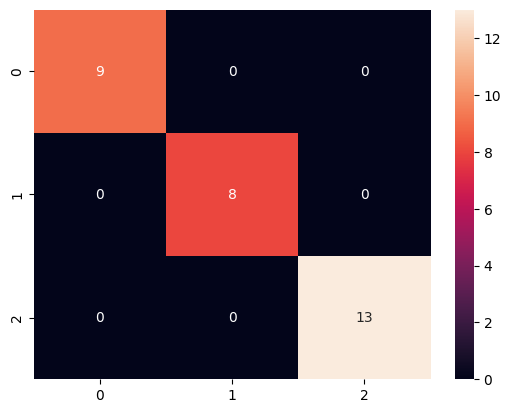

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [26]:
cls_rf = cls_rf.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 128 out of 128 | elapsed:    0.2s finished


In [27]:
y_pred = cls_rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 128 out of 128 | elapsed:    0.0s finished


In [28]:
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



<AxesSubplot: >

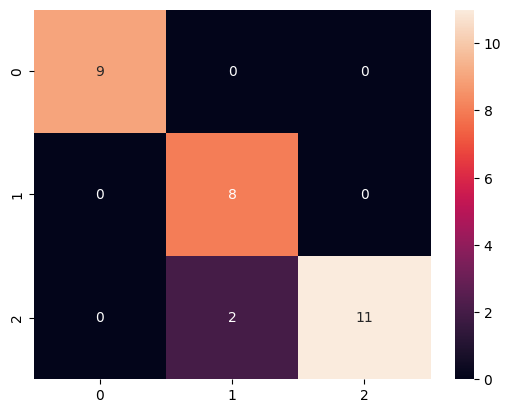

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [30]:
le = LabelEncoder()
y_train_en = le.fit_transform(y_train)
y_test_en = le.transform(y_test)

In [31]:
y_train_en

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1,
       2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1,
       2, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 2, 2])

In [32]:
cls_xb = cls_xb.fit(X_train, y_train_en)

[20:45:03] DEBUG: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/gbm/gbtree.cc:156: Using tree method: 2
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:03] 

[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra 

[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:03] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra 

[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra 

[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra 

[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra 

[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra 

[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:04] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra 

[20:45:05] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:05] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:05] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:05] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:05] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra 

[20:45:05] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[20:45:05] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[20:45:05] ======== Monitor (0): Learner ========
[20:45:05] Configure: 0.004384s, 1 calls @ 4384us

[20:45:05] EvalOneIter: 0.002873s, 1000 calls @ 2873us

[20:45:05] GetGradient: 0.148338s, 1000 calls @ 148338us

[20:45:05] PredictRaw: 0.134211s, 1000 calls @ 134211us

[20:45:05] UpdateOneIter: 1.72375s, 1000 calls @ 1723745us

[20:45:05] ======== Monitor (0): GBTree ========
[20:45:05] BoostNewTrees: 1.42905s, 1000 calls @ 1429050us

[20:45:05] CommitModel: 0.000364s, 1000 calls @ 364us

[20:45:05] ======== Monitor (0): TreePruner ========
[20:45:05] PrunerUpdate: 0.083974s, 3

In [33]:
y_pred = cls_xb.predict(X_test)

In [34]:
cr = classification_report(y_test_en, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      1.00      0.89         8
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



<AxesSubplot: >

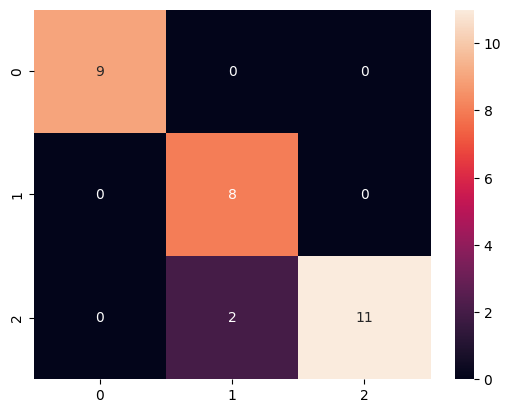

In [36]:
cm = confusion_matrix(y_test_en, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

#### Feature importance

In [59]:
cls_rf.feature_importances_

array([0.09526675, 0.02310168, 0.3836893 , 0.49794227])

In [62]:
list(X_train.columns)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [63]:
rf_feat = SelectFromModel(cls_rf, prefit=True)
rf_feat.get_feature_names_out(input_features=list(X_train.columns))

array(['PetalLengthCm', 'PetalWidthCm'], dtype=object)

In [64]:
X_train_rd = rf_feat.transform(X_train)
X_test_rd = rf_feat.transform(X_test)
X_train.shape, X_train_rd.shape, X_test.shape, X_test_rd.shape

/Users/levan/anaconda3/envs/edu4/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/levan/anaconda3/envs/edu4/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


((120, 4), (120, 2), (30, 4), (30, 2))

In [66]:
cls_rf_rd = RandomForestClassifier(n_estimators=128, 
                                   max_depth=64, 
                                   n_jobs=workers, 
                                   verbose=True)

In [67]:
cls_rf_rd.fit(X_train_rd, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 128 out of 128 | elapsed:    0.2s finished


RandomForestClassifier(max_depth=64, n_estimators=128, n_jobs=8, verbose=True)

In [68]:
y_pred = cls_rf_rd.predict(X_test_rd)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 128 out of 128 | elapsed:    0.0s finished


In [69]:
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

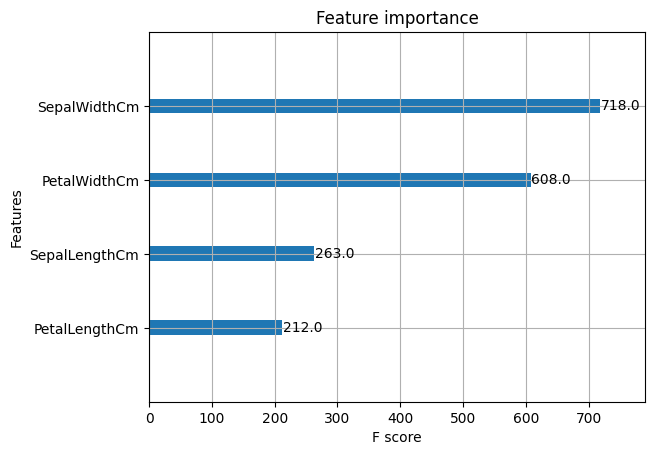

In [72]:
xgb.plot_importance(cls_xb)

<AxesSubplot: >

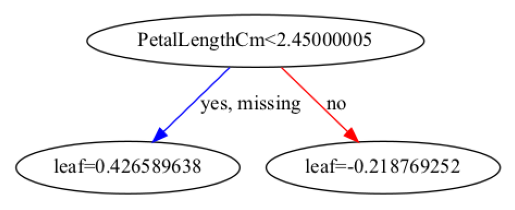

In [75]:
xgb.plot_tree(cls_xb)

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [41, 42, 37]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.498\nsamples = 79\nvalue = [0, 42, 37]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.25, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1

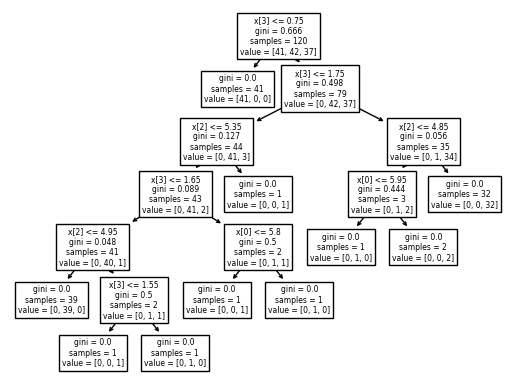

In [79]:
plot_tree(cls_tr)

[Text(0.5, 0.9, 'x[3] <= 0.75\ngini = 0.661\nsamples = 79\nvalue = [38, 47, 35]'),
 Text(0.4090909090909091, 0.7, 'gini = 0.0\nsamples = 25\nvalue = [38, 0, 0]'),
 Text(0.5909090909090909, 0.7, 'x[0] <= 6.45\ngini = 0.489\nsamples = 54\nvalue = [0, 47, 35]'),
 Text(0.36363636363636365, 0.5, 'x[0] <= 5.65\ngini = 0.37\nsamples = 33\nvalue = [0, 40, 13]'),
 Text(0.18181818181818182, 0.3, 'x[3] <= 1.6\ngini = 0.111\nsamples = 11\nvalue = [0, 16, 1]'),
 Text(0.09090909090909091, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 16, 0]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5454545454545454, 0.3, 'x[3] <= 1.7\ngini = 0.444\nsamples = 22\nvalue = [0, 24, 12]'),
 Text(0.45454545454545453, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 24, 0]'),
 Text(0.6363636363636364, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 12]'),
 Text(0.8181818181818182, 0.5, 'x[3] <= 1.65\ngini = 0.366\nsamples = 21\nvalue = [0, 7, 22]'),
 Text(0.7272727272727273, 0.3, 'gini

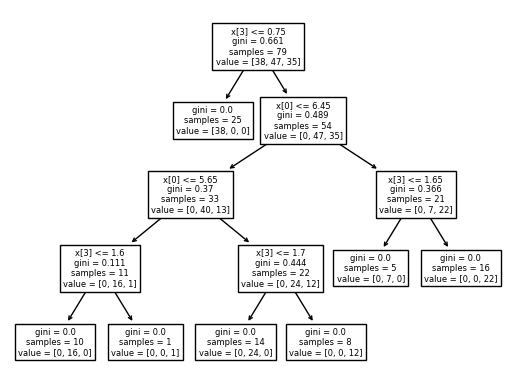

In [81]:
plot_tree(cls_rf.estimators_[64])

## Regression trees

In [84]:
pertol_consumption_path = LR_PATH / 'petrol_consumption.csv'

In [85]:
df = pd.read_csv(pertol_consumption_path)
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [86]:
df.shape

(48, 5)

In [87]:
print(df.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


#### Prepare dataset

In [88]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

## Initialize and fit

In [90]:
reg_tr = DecisionTreeRegressor(random_state=2022)
reg_rf = RandomForestRegressor(n_estimators=128, 
                               max_depth=64, 
                               n_jobs=workers, 
                               verbose=True)
reg_xb = XGBRegressor(n_estimators=1000, 
                      max_depth=1, 
                      n_jobs=workers,
                      verbosity=3,
                      random_state=2022)

## Train models

In [91]:
reg_tr = reg_tr.fit(X_train, y_train)

In [93]:
y_pred = reg_tr.predict(X_test)

In [94]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 65.90
Mean squared error: 8353.70
Root mean squared error: 91.40


In [95]:
reg_rf = reg_rf.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 128 out of 128 | elapsed:    0.2s finished


In [96]:
y_pred = reg_rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 128 out of 128 | elapsed:    0.0s finished


In [97]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 65.45
Mean squared error: 10844.39
Root mean squared error: 104.14


In [99]:
reg_xb = reg_xb.fit(X_train, y_train)

[05:41:21] DEBUG: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/gbm/gbtree.cc:156: Using tree method: 2
[05:41:21] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[05:41:21] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[05:41:21] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:21] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:21] 

[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra 

[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra 

[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[05:41:22] INFO: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/tree/updater_prune.cc:98: tree pruning end, 2 extra 

In [100]:
y_pred = reg_xb.predict(X_test)

In [101]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 63.48
Mean squared error: 7721.39
Root mean squared error: 87.87


#### Feature importance

In [103]:
reg_rf.feature_importances_

array([0.30074258, 0.12255293, 0.4398722 , 0.1368323 ])

In [105]:
list(X_train.columns)

['Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)',
 'Petrol_tax']

In [106]:
rf_feat = SelectFromModel(cls_rf, prefit=True)
rf_feat.get_feature_names_out(input_features=list(X_train.columns))

array(['Population_Driver_licence(%)', 'Petrol_tax'], dtype=object)

In [107]:
X_train_rd = rf_feat.transform(X_train)
X_test_rd = rf_feat.transform(X_test)
X_train.shape, X_train_rd.shape, X_test.shape, X_test_rd.shape

/Users/levan/anaconda3/envs/edu4/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/levan/anaconda3/envs/edu4/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


((38, 4), (38, 2), (10, 4), (10, 2))

In [108]:
cls_rf_rd = RandomForestClassifier(n_estimators=128, 
                                   max_depth=64, 
                                   n_jobs=workers, 
                                   verbose=True)

In [109]:
cls_rf_rd.fit(X_train_rd, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 128 out of 128 | elapsed:    0.2s finished


RandomForestClassifier(max_depth=64, n_estimators=128, n_jobs=8, verbose=True)

In [110]:
y_pred = cls_rf_rd.predict(X_test_rd)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 128 out of 128 | elapsed:    0.0s finished


In [112]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 90.10
Mean squared error: 16493.10
Root mean squared error: 128.43


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

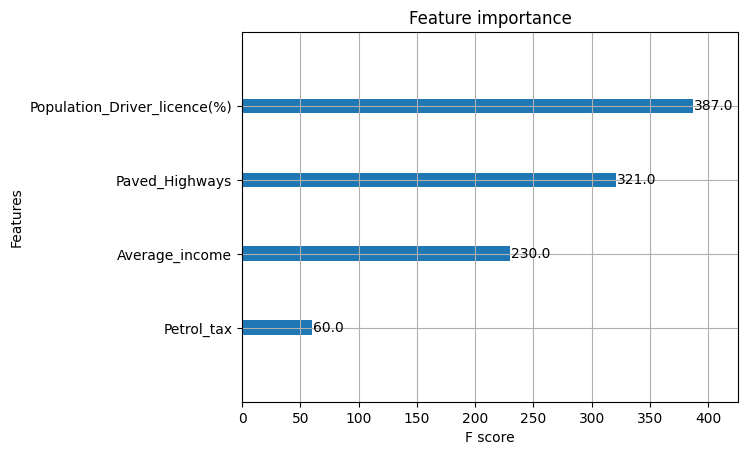

In [113]:
xgb.plot_importance(reg_xb)

<AxesSubplot: >

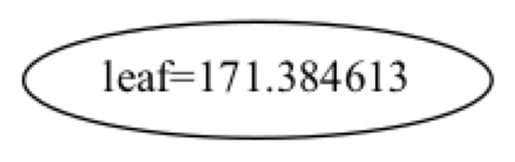

In [114]:
xgb.plot_tree(reg_xb)

[Text(0.7899096385542169, 0.9583333333333334, 'x[2] <= 0.667\nsquared_error = 8193.203\nsamples = 38\nvalue = 586.816'),
 Text(0.6280120481927711, 0.875, 'x[0] <= 4395.0\nsquared_error = 5288.805\nsamples = 35\nvalue = 571.771'),
 Text(0.4246987951807229, 0.7916666666666666, 'x[3] <= 8.75\nsquared_error = 3048.394\nsamples = 25\nvalue = 600.08'),
 Text(0.2710843373493976, 0.7083333333333334, 'x[1] <= 5062.0\nsquared_error = 2695.787\nsamples = 20\nvalue = 614.75'),
 Text(0.14457831325301204, 0.625, 'x[1] <= 4423.0\nsquared_error = 1458.139\nsamples = 6\nvalue = 655.167'),
 Text(0.12048192771084337, 0.5416666666666666, 'x[1] <= 4034.0\nsquared_error = 919.04\nsamples = 5\nvalue = 643.4'),
 Text(0.07228915662650602, 0.4583333333333333, 'x[1] <= 3810.0\nsquared_error = 816.222\nsamples = 3\nvalue = 659.667'),
 Text(0.04819277108433735, 0.375, 'x[3] <= 7.75\nsquared_error = 64.0\nsamples = 2\nvalue = 640.0'),
 Text(0.024096385542168676, 0.2916666666666667, 'squared_error = 0.0\nsamples = 1

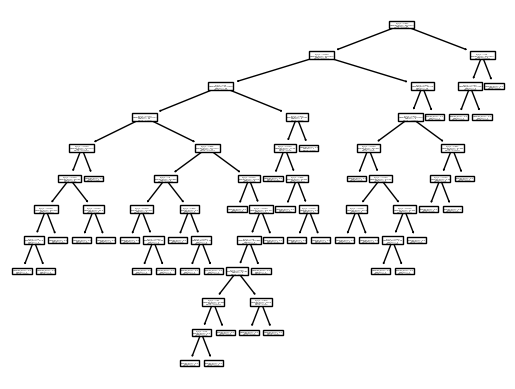

In [115]:
plot_tree(reg_tr)

[Text(0.3528225806451613, 0.9444444444444444, 'x[2] <= 0.693\nsquared_error = 8345.454\nsamples = 23\nvalue = 605.421'),
 Text(0.32056451612903225, 0.8333333333333334, 'x[1] <= 2625.0\nsquared_error = 4857.722\nsamples = 22\nvalue = 591.0'),
 Text(0.0967741935483871, 0.7222222222222222, 'x[1] <= 516.5\nsquared_error = 1627.289\nsamples = 5\nvalue = 532.727'),
 Text(0.06451612903225806, 0.6111111111111112, 'squared_error = 0.0\nsamples = 1\nvalue = 410.0'),
 Text(0.12903225806451613, 0.6111111111111112, 'x[1] <= 1418.0\nsquared_error = 133.2\nsamples = 4\nvalue = 545.0'),
 Text(0.06451612903225806, 0.5, 'x[2] <= 0.587\nsquared_error = 48.0\nsamples = 2\nvalue = 536.0'),
 Text(0.03225806451612903, 0.3888888888888889, 'squared_error = 0.0\nsamples = 1\nvalue = 524.0'),
 Text(0.0967741935483871, 0.3888888888888889, 'squared_error = 0.0\nsamples = 1\nvalue = 540.0'),
 Text(0.1935483870967742, 0.5, 'x[2] <= 0.552\nsquared_error = 100.0\nsamples = 2\nvalue = 551.0'),
 Text(0.16129032258064516

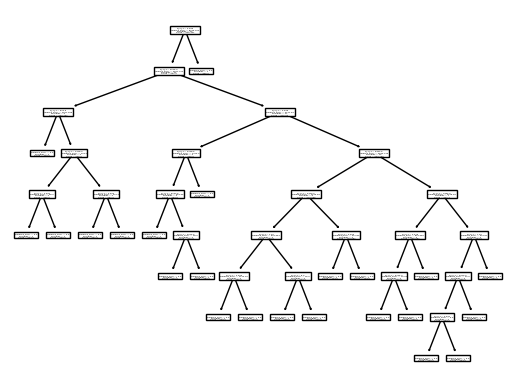

In [116]:
plot_tree(reg_rf.estimators_[64])